#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/G2Tr2dcjR3U

# 1. Importando Bibliotecas


In [4]:
# Configurando Yahoo Finance
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

In [5]:
from pandas_datareader.data import DataReader

In [6]:
df = DataReader(['^BVSP','CMIG3.SA'],'yahoo')['Adj Close']

In [11]:
coluns = df.isnull().sum()>0

Symbols
^BVSP    True
dtype: bool

In [22]:
df.drop(columns=(coluns[coluns>0].index.values))

Symbols,CMIG3.SA
Date,
2017-07-11,4.440266
2017-07-12,4.572811
2017-07-13,4.542222
2017-07-14,4.618690
2017-07-17,4.613593
...,...
2022-07-04,15.100000
2022-07-05,15.830000
2022-07-06,15.390000


In [9]:
len(df.dropna())/len(df)

0.9943684633950121

In [ ]:
if len(df.dropna())/len(df) < 1:
    

In [38]:
dff = df.pct_change()
dff.index


DatetimeIndex(['2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14',
               '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-24',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=1243, freq=None)

# 2. Obtendo e tratando os dados

In [12]:
tickers_ibov = ['CMIG3.SA','CMIG4.SA','TAEE11.SA']

dados_yahoo = yf.download(tickers=tickers_ibov, period='2y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='2y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [23]:
dados_yahoo.index.name 

'Dataa'

In [16]:
retorno = dados_yahoo.pct_change()
retorno

,CMIG3.SA,CMIG4.SA,TAEE11.SA
Date,,,
2020-07-08,NaN,NaN,NaN
2020-07-09,-0.011676,0.006087,-0.005227
2020-07-10,0.008439,-0.004321,-0.002102
2020-07-13,0.006694,0.013021,-0.001404
2020-07-14,-0.011637,-0.022279,-0.002812
...,...,...,...
2022-07-04,-0.013072,-0.012405,-0.016039
2022-07-05,0.048344,-0.021256,-0.004657
2022-07-06,-0.027795,-0.002961,0.007018


In [18]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,CMIG3.SA,CMIG4.SA,TAEE11.SA
Date,,,
2020-07-08,1.000000,1.000000,1.000000
2020-07-09,0.988324,1.006087,0.994773
2020-07-10,0.996664,1.001739,0.992683
2020-07-13,1.003336,1.014783,0.991289
2020-07-14,0.991660,0.992174,0.988502
...,...,...,...
2022-07-04,2.278281,1.739172,1.697658
2022-07-05,2.388423,1.702204,1.689752
2022-07-06,2.322037,1.697163,1.701611


# 3. Resultados

In [39]:
carteira = random.sample(list(dados_yahoo.columns) , k=3)
carteira

['CMIG4.SA', 'TAEE11.SA', 'CMIG3.SA']

In [11]:
carteira = random.sample(list(dados_yahoo.columns) , k=3)
carteira = [1/2,1/3,1/3] * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,CMIG4.SA,CMIG3.SA,TAEE11.SA,saldo,retorno
Date,,,,,
2021-07-08,0.500000,0.333333,0.333333,1.166667,NaN
2021-07-12,0.517477,0.343448,0.333422,1.194347,0.023726
2021-07-13,0.506820,0.339770,0.336544,1.183134,-0.009389
2021-07-14,0.517477,0.343218,0.339397,1.200092,0.014333
2021-07-15,0.512362,0.341609,0.338327,1.192298,-0.006495
...,...,...,...,...,...
2022-07-04,0.668233,0.497795,0.374795,1.540824,-0.013506
2022-07-05,0.654029,0.521861,0.373050,1.548940,0.005267
2022-07-06,0.652092,0.507356,0.375668,1.535116,-0.008925


<AxesSubplot:xlabel='Date'>

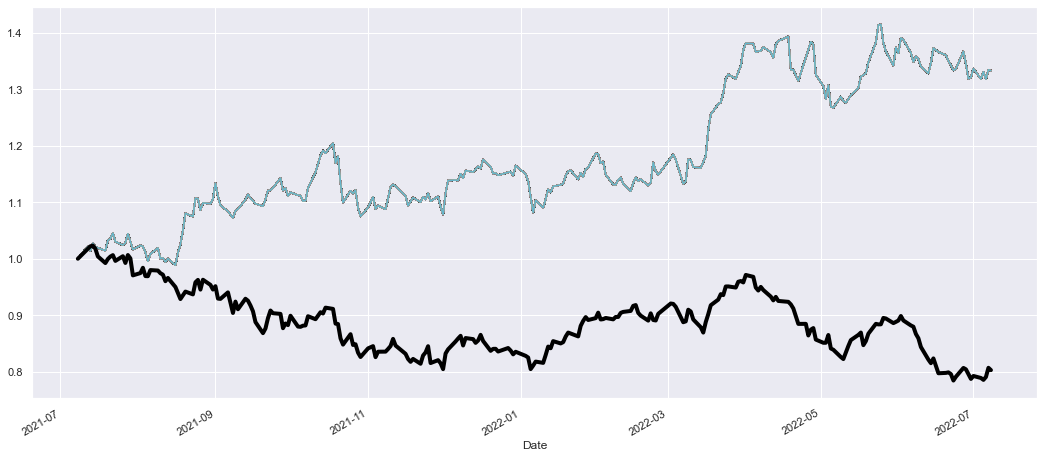

In [9]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=3)
  carteira = (1/3) * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*1).plot(linewidth=4, color='black')
  

In [3]:
from stockanalysis.pydea.dea import DEAProblem, DEAResults

In [6]:
import pandas as pd

In [9]:
df = pd.read_excel('exemplodea.xlsx')
df.index = df['DMU']
df = df.drop(columns='DMU')
df.columns = ['Ret1','Ret2','Ret3','Vol','Beta']

In [10]:
sss = DEAProblem(df[['Ret1','Ret2','Ret3']],df[['Vol','Beta']])

In [13]:
sol = sss.solve()

In [29]:
sss_s  = DEAResults.env_corr(sol,df)
with open('summary.csv', 'w') as fh:
    fh.write(sss_s.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     22.13
Date:                Tue, 12 Jul 2022   Prob (F-statistic):              0.160
Time:                        20:28:03   Log-Likelihood:                 16.646
No. Observations:                   7   AIC:                            -21.29
Df Residuals:                       1   BIC:                            -21.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2043      0.955      0.214      0.8

c:\Users\engme\Anaconda3\envs\venv\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\engme\Anaconda3\envs\venv\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
